In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
from scipy import integrate

In [2]:
def Likelihood(mu,n,b,s):
    
    l = mu*s + b
    
    L = np.exp( -l ) * l**n / np.math.factorial(int(n))
    
    return L

In [3]:
Likelihood(0.5,2.,2.,1.)

0.25651562069968376

In [4]:
def JointLikelihood(mu,data):
    
    N = data.shape[0]
    
    n = data[:,0]
    b = data[:,1]
    s = data[:,2]
    
    JointL = 1.
    
    for c in range(N):
        JointL *= Likelihood(mu,n[c],b[c],s[c])
        
    return JointL

In [48]:
def JointLogLikelihood(mu,data):
    
    N = data.shape[0]
    
    n = data[:,0]
    b = data[:,1]
    s = data[:,2]
    
    JointL = 0.
    
    for c in range(N):
        JointL += np.log(Likelihood(mu,n[c],b[c],s[c]))
        
    return -JointL

In [49]:
n = np.array([0])
b = np.array([0])
s = np.array([1])

N = n.shape[0]

data = np.zeros((N,3))

data[:,0] = n
data[:,1] = b
data[:,2] = s

data

array([[0., 0., 1.]])

In [50]:
mu = np.linspace(0.,4.,100)
JointLike = JointLikelihood(mu,data)

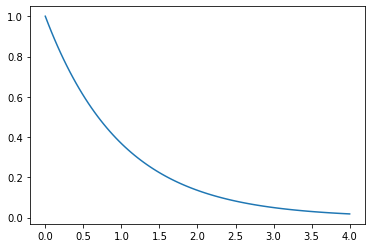

In [51]:
plt.plot(mu,JointLike)

In [52]:
Norm = integrate.quad( JointLikelihood, 0, np.inf, args=(data) )[0]
Norm

1.0000000000000002

In [53]:
JointLike = JointLike/Norm

In [54]:
#Calcular el percentile 95
mup = 0.
I = 0.
tolerancia = 1e-4

while np.abs(I - 0.95) > tolerancia:
    
    I = integrate.quad( JointLikelihood, 0.,mup, args=(data) )[0]
    
    mup += tolerancia
    
print(mup,I)

2.9939000000018936 0.9499032929202184


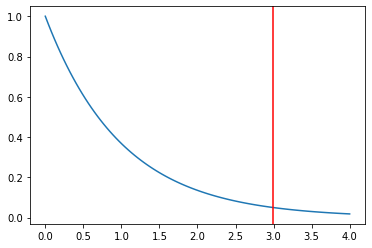

In [55]:
plt.plot(mu,JointLike)
plt.axvline(x=mup,color='r')

In [56]:
n = np.array([1])
b = np.array([0])
s = np.array([1])

N = n.shape[0]

data1 = np.zeros((N,3))

data1[:,0] = n
data1[:,1] = b
data1[:,2] = s

data1

array([[1., 0., 1.]])

In [57]:
JointLike1 = JointLikelihood(mu,data1)

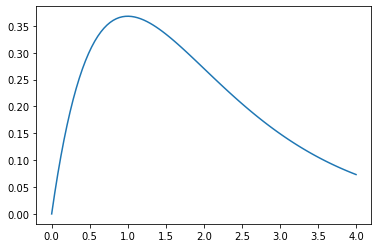

In [58]:
plt.plot(mu,JointLike1)

In [59]:
ii = np.where( JointLike1 == np.amax(JointLike1) )
muhat = mu[ii][0]
print(muhat)

1.0101010101010102


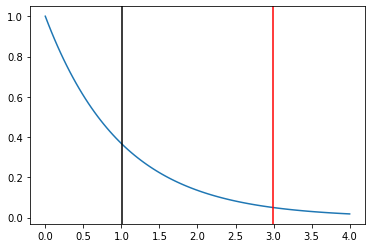

In [60]:
plt.plot(mu,JointLike)
plt.axvline(x=mup,color='r')
plt.axvline(x=muhat,color='k')

In [61]:
n = np.array([0,2,1])
b = np.array([0,0,0])
s = np.array([1,3,2])

N = n.shape[0]

data2 = np.zeros((N,3))

data2[:,0] = n
data2[:,1] = b
data2[:,2] = s

data2

array([[0., 0., 1.],
       [2., 0., 3.],
       [1., 0., 2.]])

In [62]:
JointLike2 = JointLikelihood(mu,data2)

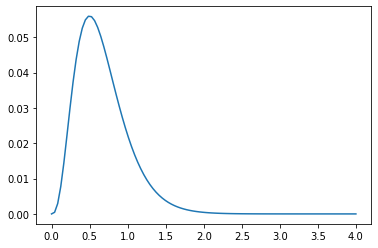

In [63]:
plt.plot(mu,JointLike2)

In [64]:
Norm = integrate.quad( JointLikelihood, 0, np.inf, args=(data2) )[0]
Norm

0.04166666666666671

In [65]:
JointLike2 = JointLike2/Norm

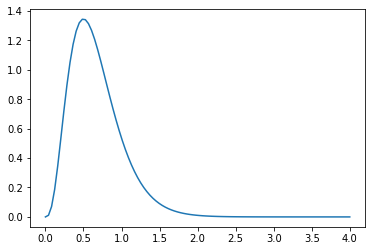

In [66]:
plt.plot(mu,JointLike2)

In [67]:
nll = lambda *p: JointLogLikelihood(*p)
nll(0.2,data2)

3.8310891599660817

In [70]:
m0 = 0.5
result = spo.minimize(nll,m0,args=(data2),options={'disp':True})

Optimization terminated successfully.
         Current function value: 2.882217
         Iterations: 0
         Function evaluations: 2
         Gradient evaluations: 1


In [71]:
result

      fun: 2.8822169643436166
 hess_inv: array([[1]])
      jac: array([8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0.5])